In [1]:
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch
import numpy as np
import os, time, random
import argparse
from torch.utils.data import Dataset, DataLoader
from PIL import Image as PILImage

from model.model import InvISPNet
from dataset.de_dataset import deDataset
from config.config import get_arguments

from tqdm import tqdm
import cv2
import imageio
from skimage.measure import compare_psnr, compare_ssim, compare_mse, shannon_entropy,compare_nrmse
from matplotlib import pyplot as plt
import math
import scipy.io as io

In [2]:
os.system('nvidia-smi -q -d Memory |grep -A4 GPU|grep Free >tmp')
os.environ['CUDA_VISIBLE_DEVICES'] = str(np.argmax([int(x.split()[2]) for x in open('tmp', 'r').readlines()]))
os.system('rm tmp')

parser = get_arguments()
parser.add_argument("--ckpt", type=str, default="./exps/VOC/train/checkpoint/0015.pth", help="Checkpoint path.") 
parser.add_argument("--out_path", type=str, default="./exps/", help="Path to save results. ")
parser.add_argument("--dataset", type=str, default="Ncd", help="dataset name. ")

# args = parser.parse_args()
args, unknown = parser.parse_known_args()
# print("Parsed arguments: {}".format(args))

In [3]:
net = InvISPNet(channel_in=3, channel_out=3, block_num=8)
device = torch.device("cuda:0")

net.to(device)
net.eval()
# load the pretrained weight if there exists one
if os.path.isfile(args.ckpt):
    net.load_state_dict(torch.load(args.ckpt), strict=False)
    print("[INFO] Loaded checkpoint: {}".format(args.ckpt))
else:
    assert 0

print("[INFO] Start data load and preprocessing") 

Dataset = deDataset(opt=args,root1='./data/test/color',root2='./data/test/gray')
dataloader = DataLoader(Dataset, batch_size=args.batch_size, shuffle=False, num_workers=0, drop_last=True)

PSNR=[]
PSNR_REV=[]

SSIM=[]
SSIM_REV=[]

[INFO] Loaded checkpoint: ./exps/VOC/train/checkpoint/0015.pth
[INFO] Start data load and preprocessing


[INFO] Start test...


  0%|          | 0/31 [00:00<?, ?it/s]

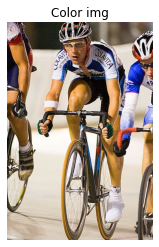

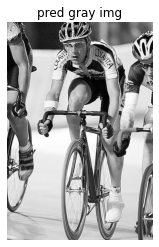

  3%|▎         | 1/31 [00:00<00:22,  1.31it/s]

[INFO] Epoch time:  0.6399238109588623 task:  test


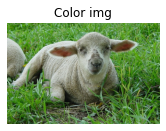

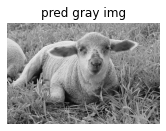

  6%|▋         | 2/31 [00:01<00:19,  1.51it/s]

[INFO] Epoch time:  0.5858793258666992 task:  test


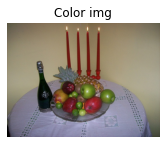

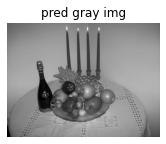

 10%|▉         | 3/31 [00:02<00:19,  1.47it/s]

[INFO] Epoch time:  0.6910483837127686 task:  test


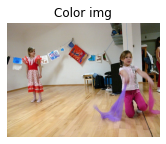

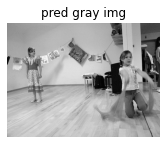

 13%|█▎        | 4/31 [00:02<00:17,  1.51it/s]

[INFO] Epoch time:  0.6285195350646973 task:  test


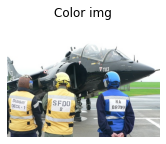

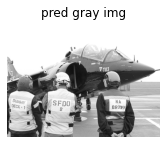

 16%|█▌        | 5/31 [00:03<00:16,  1.54it/s]

[INFO] Epoch time:  0.6137053966522217 task:  test


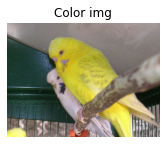

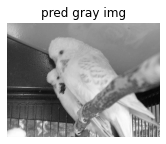

 19%|█▉        | 6/31 [00:03<00:16,  1.56it/s]

[INFO] Epoch time:  0.6189169883728027 task:  test


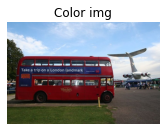

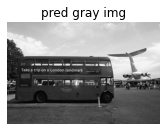

 23%|██▎       | 7/31 [00:04<00:15,  1.59it/s]

[INFO] Epoch time:  0.5867264270782471 task:  test


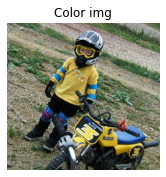

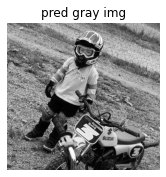

 26%|██▌       | 8/31 [00:05<00:14,  1.55it/s]

[INFO] Epoch time:  0.6670160293579102 task:  test


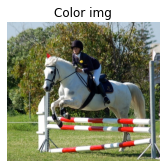

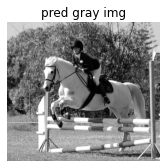

 29%|██▉       | 9/31 [00:05<00:14,  1.51it/s]

[INFO] Epoch time:  0.6865882873535156 task:  test


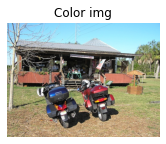

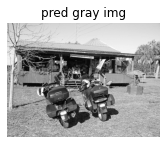

 32%|███▏      | 10/31 [00:06<00:13,  1.54it/s]

[INFO] Epoch time:  0.613915205001831 task:  test


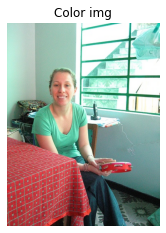

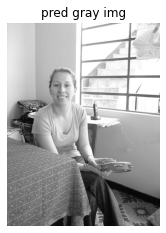

 35%|███▌      | 11/31 [00:07<00:12,  1.55it/s]

[INFO] Epoch time:  0.625115156173706 task:  test


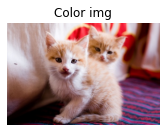

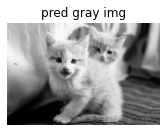

 39%|███▊      | 12/31 [00:07<00:12,  1.58it/s]

[INFO] Epoch time:  0.590416669845581 task:  test


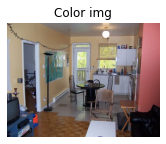

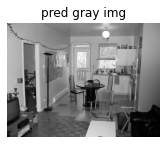

 42%|████▏     | 13/31 [00:08<00:11,  1.57it/s]

[INFO] Epoch time:  0.6369659900665283 task:  test


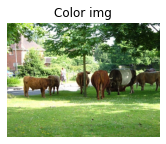

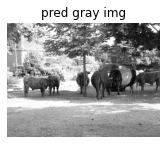

 45%|████▌     | 14/31 [00:09<00:10,  1.57it/s]

[INFO] Epoch time:  0.6244924068450928 task:  test


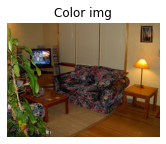

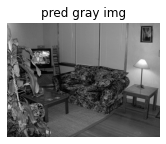

 48%|████▊     | 15/31 [00:09<00:10,  1.57it/s]

[INFO] Epoch time:  0.6279153823852539 task:  test


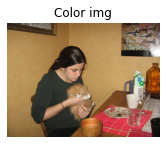

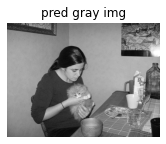

 52%|█████▏    | 16/31 [00:10<00:09,  1.57it/s]

[INFO] Epoch time:  0.6204679012298584 task:  test


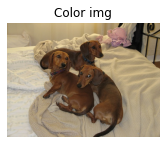

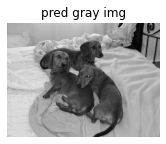

 55%|█████▍    | 17/31 [00:10<00:08,  1.57it/s]

[INFO] Epoch time:  0.6288337707519531 task:  test


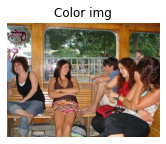

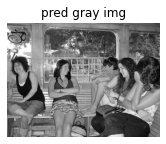

 58%|█████▊    | 18/31 [00:11<00:08,  1.51it/s]

[INFO] Epoch time:  0.7123100757598877 task:  test


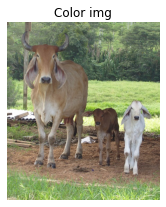

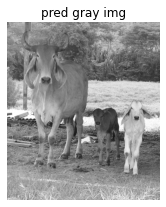

 61%|██████▏   | 19/31 [00:12<00:08,  1.48it/s]

[INFO] Epoch time:  0.69254469871521 task:  test


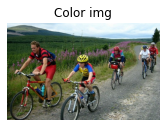

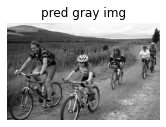

 65%|██████▍   | 20/31 [00:12<00:07,  1.54it/s]

[INFO] Epoch time:  0.5834057331085205 task:  test


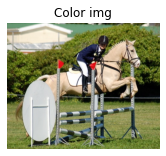

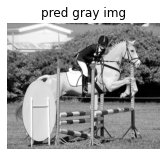

 68%|██████▊   | 21/31 [00:13<00:06,  1.55it/s]

[INFO] Epoch time:  0.6290762424468994 task:  test


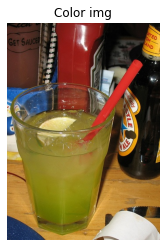

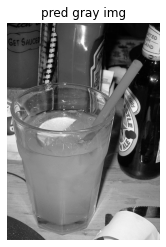

 71%|███████   | 22/31 [00:14<00:05,  1.58it/s]

[INFO] Epoch time:  0.5945549011230469 task:  test


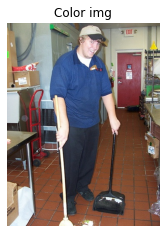

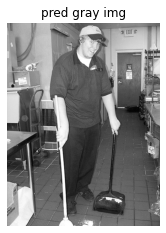

 74%|███████▍  | 23/31 [00:14<00:05,  1.57it/s]

[INFO] Epoch time:  0.6360359191894531 task:  test


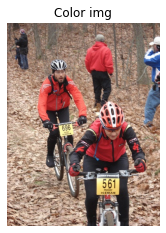

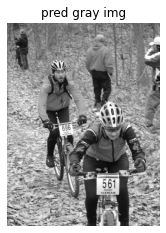

 77%|███████▋  | 24/31 [00:15<00:04,  1.57it/s]

[INFO] Epoch time:  0.6242976188659668 task:  test


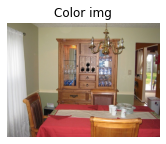

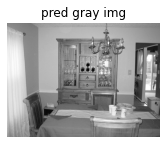

 81%|████████  | 25/31 [00:16<00:03,  1.57it/s]

[INFO] Epoch time:  0.630687952041626 task:  test


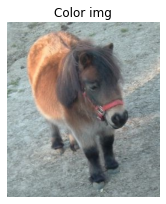

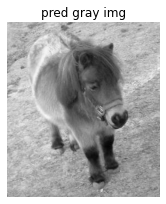

 84%|████████▍ | 26/31 [00:16<00:02,  1.74it/s]

[INFO] Epoch time:  0.42121362686157227 task:  test


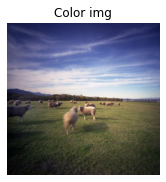

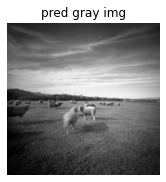

 87%|████████▋ | 27/31 [00:17<00:02,  1.57it/s]

[INFO] Epoch time:  0.7715444564819336 task:  test


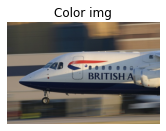

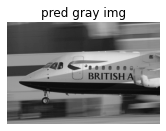

 90%|█████████ | 28/31 [00:17<00:01,  1.60it/s]

[INFO] Epoch time:  0.5816090106964111 task:  test


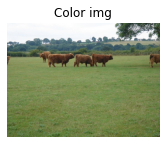

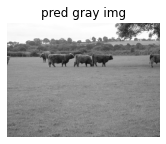

 94%|█████████▎| 29/31 [00:18<00:01,  1.60it/s]

[INFO] Epoch time:  0.6244747638702393 task:  test


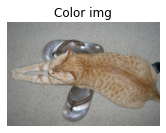

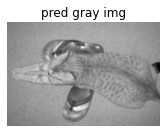

 97%|█████████▋| 30/31 [00:19<00:00,  1.62it/s]

[INFO] Epoch time:  0.5828535556793213 task:  test


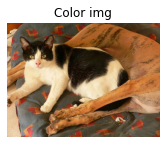

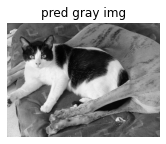

100%|██████████| 31/31 [00:19<00:00,  1.56it/s]

[INFO] Epoch time:  0.6577863693237305 task:  test
ave_psnr 45.648412954207714
ave_psnr_rev 64.77082270876811
ave_ssim 0.9981630534384439
ave_ssim_rev 0.999807407279188


In [4]:
print("[INFO] Start test...") 
for i_batch, sample_batched in enumerate(tqdm(dataloader)):
    step_time = time.time() 

    input, target_forward, input_target = sample_batched['input_ch'].to(device), sample_batched['target_forward_img'].to(device), \
                        sample_batched['input_target_img'].to(device)

    file_name = sample_batched['file_name'][0]        


    with torch.no_grad():
        reconstruct_for = net(input)
        reconstruct_for = torch.clamp(reconstruct_for, 0, 1)

        reconstruct_rev = net(reconstruct_for, rev=True)

    pred_rev = reconstruct_rev.detach().permute(0,2,3,1).squeeze()  
    pred_rev = torch.clamp(pred_rev, 0, 1).cpu().numpy() 
    
    pred_img = reconstruct_for.detach().permute(0,2,3,1).squeeze().cpu().numpy()   
    target_forward_img = target_forward.permute(0,2,3,1).squeeze().cpu().numpy() 
    
    pred_for = ( pred_img[:,:,0] + pred_img[:,:,1] + pred_img[:,:,2] ) / 3.0
    target_forward_patch = ( target_forward_img[:,:,0] + target_forward_img[:,:,1] + target_forward_img[:,:,2] ) / 3.0
            
    target_rev_patch = input_target.permute(0,2,3,1).squeeze().cpu().numpy()  
                
    target_rev = target_rev_patch

    plt.figure()
    plt.subplot(1,2,1)
    plt.axis('off')
    plt.title('Color img')
    plt.imshow(target_rev[:,:,::-1])
    plt.show()

    plt.figure()
    plt.subplot(1,2,2)
    plt.axis('off')
    plt.title('pred gray img')
    plt.imshow(pred_for, cmap='gray')
    plt.show()


    psnr = compare_psnr( 255 * abs(target_forward_patch),255 * abs(pred_for), data_range=255)
    psnr_rev = compare_psnr( 255 * abs(target_rev),255 * abs(pred_rev), data_range=255)
    ssim = compare_ssim(abs(target_forward_patch), abs(pred_for), data_range=1,multichannel=True)
    ssim_rev = compare_ssim(abs(target_rev), abs(pred_rev), data_range=1,multichannel=True)

    mse = compare_mse(target_forward_patch,pred_for)

    nmse =  np.sum((pred_for - target_forward_patch) ** 2.) / np.sum(target_forward_patch**2)

    times =  time.time()-step_time

    PSNR.append(psnr)
    PSNR_REV.append(psnr_rev)

    SSIM.append(ssim)
    SSIM_REV.append(ssim_rev)
        
    
    print("[INFO] Epoch time: ", time.time()-step_time, "task: ", args.task)

    del reconstruct_for
    del reconstruct_rev

ave_psnr = sum(PSNR) / len(PSNR)
PSNR_std = np.std(PSNR)

ave_psnr_rev = sum(PSNR_REV) / len(PSNR_REV)
PSNR_REV_std = np.std(PSNR_REV)


ave_ssim = sum(SSIM) / len(SSIM)
SSIM_std = np.std(SSIM)

ave_ssim_rev = sum(SSIM_REV) / len(SSIM_REV)
SSIM_REV_std = np.std(SSIM_REV)

print('ave_psnr',ave_psnr)
print('ave_psnr_rev',ave_psnr_rev)

print('ave_ssim',ave_ssim)
print('ave_ssim_rev',ave_ssim_rev)
